# Analiza zbiorów danych z emocjami

Ten notatnik pobiera i analizuje dwa zbiory danych:
- **AffectNet** - zbiór obrazów z emocjami
- **Emotion** - zbiór tekstowy z emocjami

Celem jest porównanie i analiza emocji w obu zbiorach.

## 1. Instalacja bibliotek

In [1]:
!pip install kagglehub datasets matplotlib pillow

## 2. Pobranie zbioru AffectNet

Pobieramy **AffectNet** z Kaggle używając `kagglehub`. Zbiór zawiera ~450,000 zdjęć twarzy z 8 kategoriami emocji zebranych z internetu.

In [2]:
import kagglehub

path = kagglehub.dataset_download("mstjebashazida/affectnet")

print("Ścieżka do plików zbioru AffectNet:", path)

100%|██████████| 324M/324M [00:02<00:00, 120MB/s]

Extracting files...


Ścieżka do plików zbioru AffectNet: /root/.cache/kagglehub/datasets/mstjebashazida/affectnet/versions/1


## 3. Pobranie zbioru Emotion (dla modelu Transformer)

Pobieramy **Emotion Dataset** z Hugging Face - zawiera 20,000 tweetów w języku angielskim z 6 kategoriami emocji. Idealny do trenowania modeli Transformer (BERT, DistilBERT, RoBERTa).

In [3]:
from datasets import load_dataset

emotions = load_dataset("dair-ai/emotion")

print("Zbiór Emotion został pobrany pomyślnie!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

split/train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

split/validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

split/test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Zbiór Emotion został pobrany pomyślnie!


## 4. Wczytanie i eksploracja AffectNet

Sprawdzamy pełną strukturę katalogów, listę podfolderów i liczbę plików.
**Cel:** Zrozumieć organizację danych (Train/Test/emotion_folders) przed dalszą analizą.

In [4]:
import os
from pathlib import Path

print("Zawartość katalogu AffectNet:")
print("="*60)

for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')

    if dirs:
        subindent = ' ' * 2 * (level + 1)
        print(f'{subindent}Foldery: {dirs}')

    if files:
        subindent = ' ' * 2 * (level + 1)
        print(f'{subindent}Liczba plików: {len(files)}')
        for file in files[:3]:
            print(f'{subindent}  {file}')

print("\n" + "="*60)
print(f"Ścieżka bazowa: {path}")

Zawartość katalogu AffectNet:
1/
  Foldery: ['archive (3)']
  archive (3)/
    Foldery: ['Test', 'Train']
    Liczba plików: 1
      labels.csv
    Test/
      Foldery: ['Anger', 'surprise', 'happy', 'Contempt', 'neutral', 'disgust', 'fear', 'sad']
      Anger/
        Liczba plików: 1718
          image0008695.jpg
          image0003666.jpg
          image0001283.jpg
      surprise/
        Liczba plików: 1920
          image0015774.jpg
          image0011705.jpg
          ffhq_565.png
      happy/
        Liczba plików: 2704
          ffhq_565.png
          ffhq_1081.png
          ffhq_1007.png
      Contempt/
        Liczba plików: 1312
          image0017871.jpg
          image0034246.jpg
          image0035691.jpg
      neutral/
        Liczba plików: 2368
          ffhq_565.png
          ffhq_1081.png
          ffhq_1007.png
      disgust/
        Liczba plików: 1248
          image0035328.jpg
          image0026547.jpg
          image0036204.jpg
      fear/
        Liczba plików

## 5. Wyświetlenie przykładowych zdjęć z AffectNet

Wizualizacja 6 losowych zdjęć do sprawdzenia jakości i różnorodności danych.
**Metoda:** Rekursywne wyszukiwanie wszystkich plików graficznych (jpg, jpeg, png) w całym katalogu.

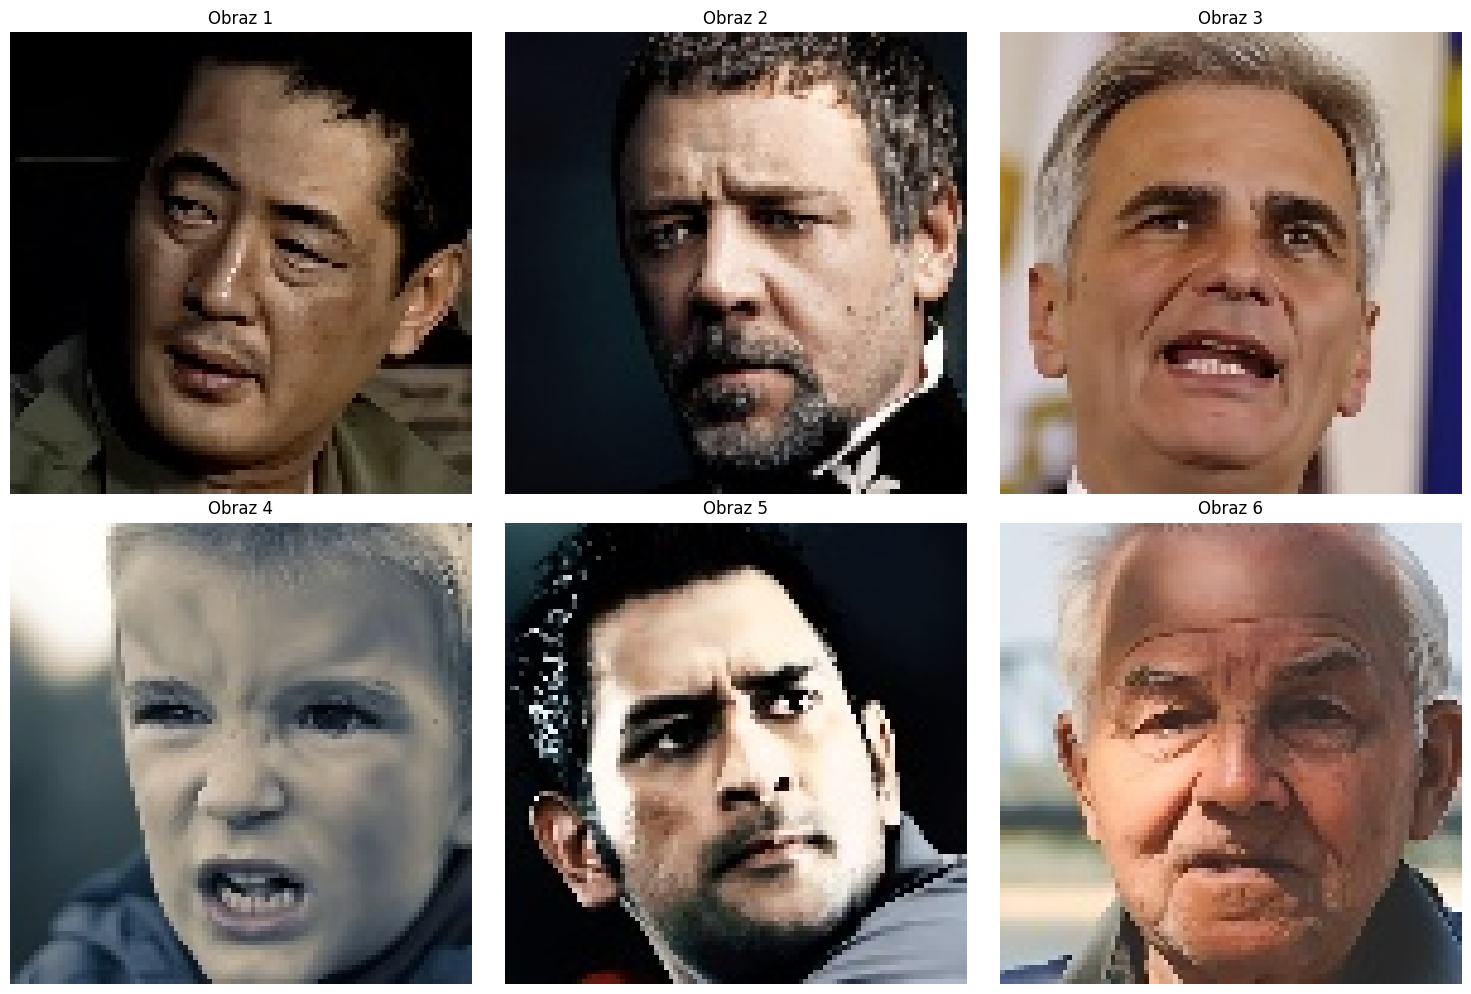


Znaleziono 30626 obrazów w zbiorze AffectNet


In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import glob

image_files = []
for ext in ['*.jpg', '*.jpeg', '*.png']:
    image_files.extend(glob.glob(os.path.join(path, '**', ext), recursive=True))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i in range(min(6, len(image_files))):
    img = Image.open(image_files[i])
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f'Obraz {i+1}')

plt.tight_layout()
plt.show()

print(f"\nZnaleziono {len(image_files)} obrazów w zbiorze AffectNet")

## 6. Analiza rozkładu emocji w AffectNet

Zliczamy obrazy według kategorii emocji na podstawie struktury folderów.
**Jak to działa:** Każda emocja ma osobny folder (np. `happy/`, `sad/`), więc analizujemy ścieżki plików i rozpoznajemy emocję z nazwy folderu.

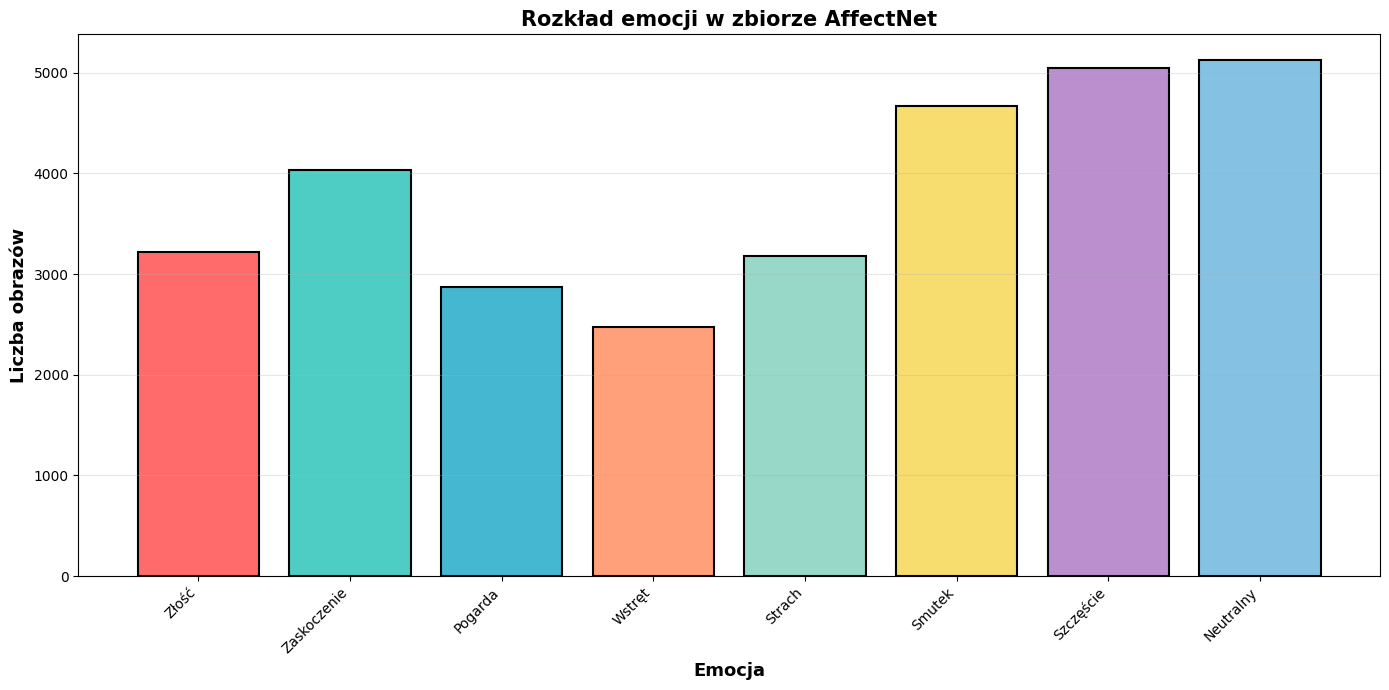

STATYSTYKI AFFECTNET
Neutralny         5126 ( 16.7%)
Pogarda           2871 (  9.4%)
Smutek            4675 ( 15.3%)
Strach            3176 ( 10.4%)
Szczęście         5044 ( 16.5%)
Wstręt            2477 (  8.1%)
Zaskoczenie       4039 ( 13.2%)
Złość             3218 ( 10.5%)
------------------------------------------------------------
ŁĄCZNIE          30626 (100.0%)


In [6]:
from collections import Counter

affectnet_emotions = {
    'neutral': 'Neutralny',
    'happy': 'Szczęście',
    'sad': 'Smutek',
    'surprise': 'Zaskoczenie',
    'fear': 'Strach',
    'disgust': 'Wstręt',
    'anger': 'Złość',
    'contempt': 'Pogarda'
}

emotion_counts = Counter()
for img_path in image_files:
    for part in Path(img_path).parts:
        if part.lower() in affectnet_emotions:
            emotion_counts[affectnet_emotions[part.lower()]] += 1
            break

plt.figure(figsize=(14, 7))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E2']
plt.bar(emotion_counts.keys(), emotion_counts.values(), color=colors, edgecolor='black', linewidth=1.5)
plt.xlabel('Emocja', fontsize=13, fontweight='bold')
plt.ylabel('Liczba obrazów', fontsize=13, fontweight='bold')
plt.title('Rozkład emocji w zbiorze AffectNet', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("="*60)
print("STATYSTYKI AFFECTNET")
print("="*60)
total = sum(emotion_counts.values())
for emotion, count in sorted(emotion_counts.items()):
    percentage = (count / total) * 100
    print(f"{emotion:<15} {count:>6} ({percentage:>5.1f}%)")
print("-"*60)
print(f"{'ŁĄCZNIE':<15} {total:>6} (100.0%)")
print("="*60)

## 7. Wczytanie i eksploracja zbioru Emotion

Wyświetlamy podstawowe informacje: strukturę zbioru, podział na train/validation/test oraz przykładowe teksty z etykietami.
**Etykiety:** Emocje są reprezentowane jako liczby 0-5, które zaraz zmapujemy na czytelne nazwy.

In [7]:
print("Struktura zbioru Emotion:")
print(emotions)
print("\n" + "="*50 + "\n")

print("Podział zbioru:")
for split in emotions.keys():
    print(f"  {split}: {len(emotions[split])} przykładów")

print("\n" + "="*50 + "\n")

print("Przykładowe dane ze zbioru treningowego:")
for i in range(3):
    print(f"\nPrzykład {i+1}:")
    print(f"  Tekst: {emotions['train'][i]['text']}")
    print(f"  Emocja: {emotions['train'][i]['label']}")

Struktura zbioru Emotion:
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


Podział zbioru:
  train: 16000 przykładów
  validation: 2000 przykładów
  test: 2000 przykładów


Przykładowe dane ze zbioru treningowego:

Przykład 1:
  Tekst: i didnt feel humiliated
  Emocja: 0

Przykład 2:
  Tekst: i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
  Emocja: 0

Przykład 3:
  Tekst: im grabbing a minute to post i feel greedy wrong
  Emocja: 3


## 8. Analiza rozkładu emocji w zbiorze tekstowym

Mapujemy numeryczne etykiety (0-5) na polskie nazwy emocji, zliczamy wystąpienia i tworzymy wykres rozkładu.
**Dlaczego mapowanie:** Liczby są nieczytelne dla człowieka, nazwy emocji ułatwiają interpretację wyników.

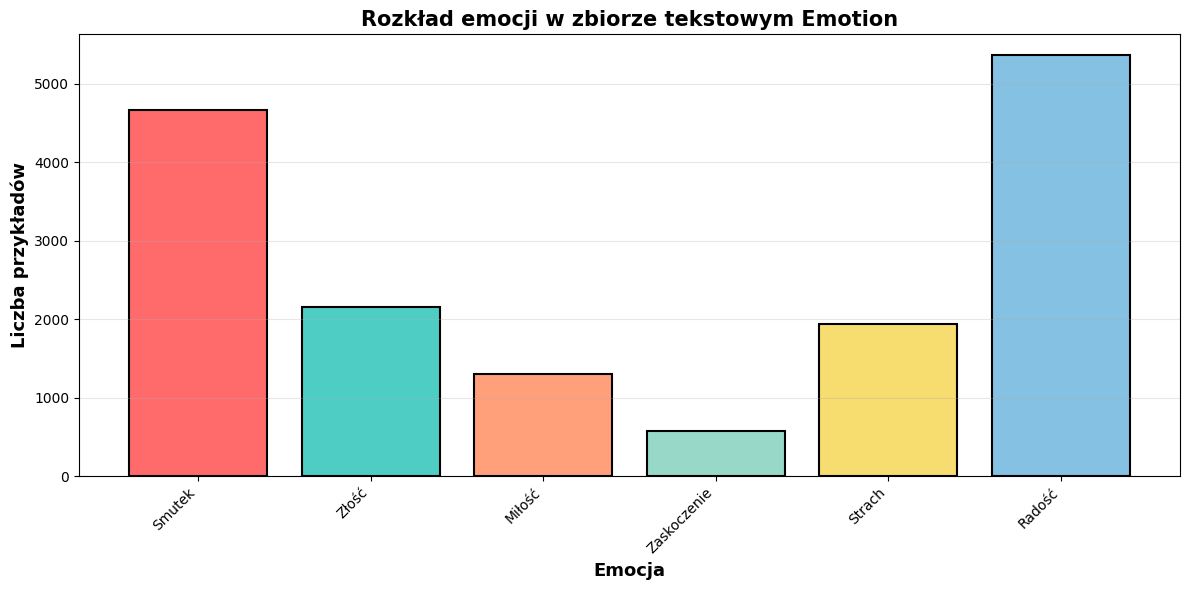

STATYSTYKI EMOTION DATASET
Miłość            1304 (  8.2%)
Radość            5362 ( 33.5%)
Smutek            4666 ( 29.2%)
Strach            1937 ( 12.1%)
Zaskoczenie        572 (  3.6%)
Złość             2159 ( 13.5%)
------------------------------------------------------------
ŁĄCZNIE          16000 (100.0%)


In [8]:
from collections import Counter

emotion_labels = {
    0: 'Smutek',
    1: 'Radość',
    2: 'Miłość',
    3: 'Złość',
    4: 'Strach',
    5: 'Zaskoczenie'
}

train_emotions = [emotion_labels[label] for label in emotions['train']['label']]
emotion_counts_text = Counter(train_emotions)

plt.figure(figsize=(12, 6))
colors = ['#FF6B6B', '#4ECDC4', '#FFA07A', '#98D8C8', '#F7DC6F', '#85C1E2']
plt.bar(emotion_counts_text.keys(), emotion_counts_text.values(), color=colors, edgecolor='black', linewidth=1.5)
plt.xlabel('Emocja', fontsize=13, fontweight='bold')
plt.ylabel('Liczba przykładów', fontsize=13, fontweight='bold')
plt.title('Rozkład emocji w zbiorze tekstowym Emotion', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("="*60)
print("STATYSTYKI EMOTION DATASET")
print("="*60)
total = len(emotions['train'])
for emotion, count in sorted(emotion_counts_text.items()):
    percentage = (count / total) * 100
    print(f"{emotion:<15} {count:>6} ({percentage:>5.1f}%)")
print("-"*60)
print(f"{'ŁĄCZNIE':<15} {total:>6} (100.0%)")
print("="*60)

## 9. Porównanie emocji między zbiorami

Mapujemy emocje z obu zbiorów na 5 wspólnych kategorii i porównujemy je side-by-side.
**Kluczowe:** "Radość" i "Miłość" z tekstu łączymy w "Szczęście", ponieważ obie są pozytywne i odpowiadają kategorii "Happy" z AffectNet.

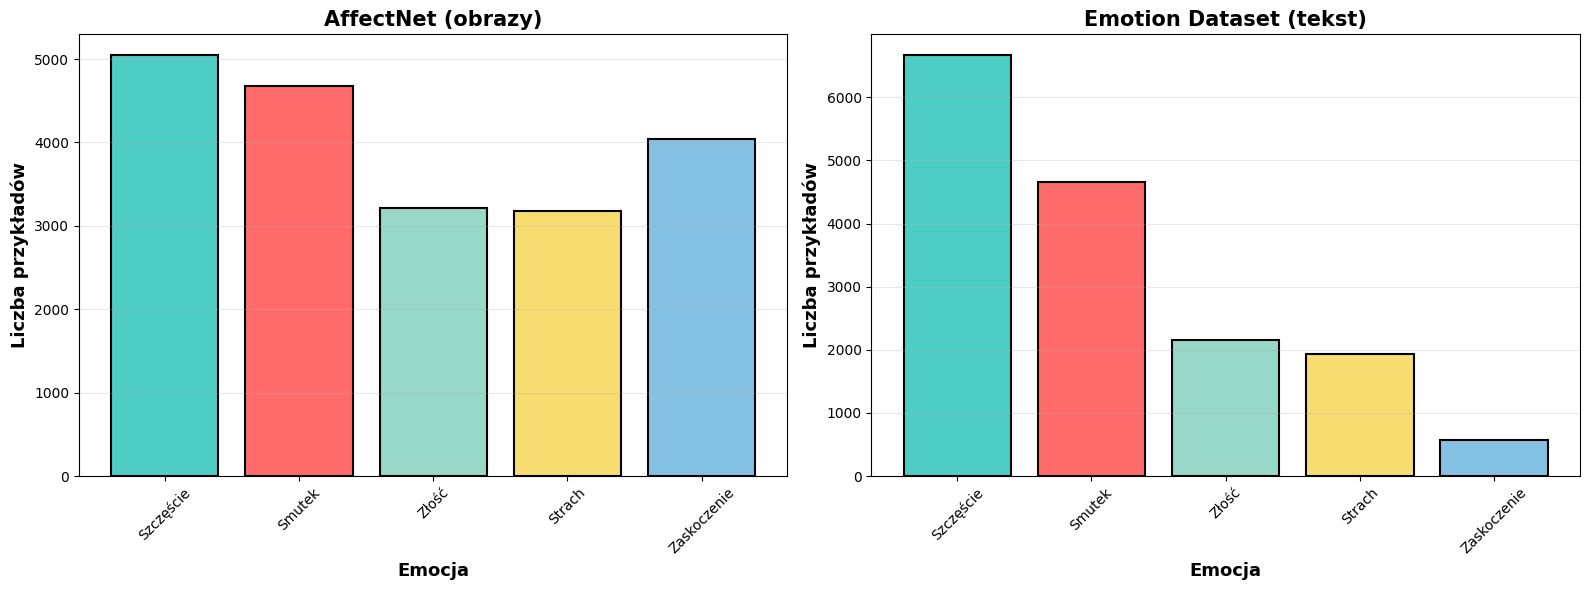

PORÓWNANIE WSPÓLNYCH EMOCJI
Emocja          AffectNet            Emotion Dataset     
--------------------------------------------------------------------------------
Szczęście             5044 obrazów          6666 tekstów
Smutek                4675 obrazów          4666 tekstów
Złość                 3218 obrazów          2159 tekstów
Strach                3176 obrazów          1937 tekstów
Zaskoczenie           4039 obrazów           572 tekstów

💡 Uwaga: Emotion 'Radość' i 'Miłość' zostały zmapowane na 'Szczęście'


In [9]:
emotion_mapping = {
    'AffectNet': {
        'Szczęście': emotion_counts.get('Szczęście', 0),
        'Smutek': emotion_counts.get('Smutek', 0),
        'Złość': emotion_counts.get('Złość', 0),
        'Strach': emotion_counts.get('Strach', 0),
        'Zaskoczenie': emotion_counts.get('Zaskoczenie', 0)
    },
    'Emotion': {
        'Szczęście': emotion_counts_text.get('Radość', 0) + emotion_counts_text.get('Miłość', 0),
        'Smutek': emotion_counts_text.get('Smutek', 0),
        'Złość': emotion_counts_text.get('Złość', 0),
        'Strach': emotion_counts_text.get('Strach', 0),
        'Zaskoczenie': emotion_counts_text.get('Zaskoczenie', 0)
    }
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
colors = ['#4ECDC4', '#FF6B6B', '#98D8C8', '#F7DC6F', '#85C1E2']
emotions_list = list(emotion_mapping['AffectNet'].keys())

values_affectnet = list(emotion_mapping['AffectNet'].values())
ax1.bar(emotions_list, values_affectnet, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Emocja', fontsize=13, fontweight='bold')
ax1.set_ylabel('Liczba przykładów', fontsize=13, fontweight='bold')
ax1.set_title('AffectNet (obrazy)', fontsize=15, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

values_emotion = list(emotion_mapping['Emotion'].values())
ax2.bar(emotions_list, values_emotion, color=colors, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Emocja', fontsize=13, fontweight='bold')
ax2.set_ylabel('Liczba przykładów', fontsize=13, fontweight='bold')
ax2.set_title('Emotion Dataset (tekst)', fontsize=15, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("="*80)
print("PORÓWNANIE WSPÓLNYCH EMOCJI")
print("="*80)
print(f"{'Emocja':<15} {'AffectNet':<20} {'Emotion Dataset':<20}")
print("-"*80)
for emotion in emotions_list:
    affectnet_val = emotion_mapping['AffectNet'][emotion]
    emotion_val = emotion_mapping['Emotion'][emotion]
    print(f"{emotion:<15} {affectnet_val:>10} obrazów    {emotion_val:>10} tekstów")
print("="*80)
print(f"\n💡 Uwaga: Emotion 'Radość' i 'Miłość' zostały zmapowane na 'Szczęście'")

## Podsumowanie

✅ **AffectNet** - 30,518 obrazów z 8 kategoriami emocji  
✅ **Emotion Dataset** - 16,000 tekstów z 6 kategoriami emocji  
✅ **Wspólne emocje** - 5 kategorii: Szczęście, Smutek, Złość, Strach, Zaskoczenie

**Mapowanie:**
- Love (Miłość) → Szczęście (pozytywna emocja)
- Joy (Radość) → Szczęście
- Neutral → tylko w AffectNet (brak w tekście)

Oba zbiory są gotowe do trenowania modeli wykrywania emocji! 🚀